In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_table("predicted_vs_true.tsv")
df

,Acession code,Predicted,True
0,Q13015,0,0
1,P04921,0,0
2,Q8BG31,0,0
3,Q03482,0,0
4,O94428,0,0
...,...,...,...
2119,P05367,1,1
2120,P31723,1,1
2121,P16150,1,1
2122,Q05928,1,1


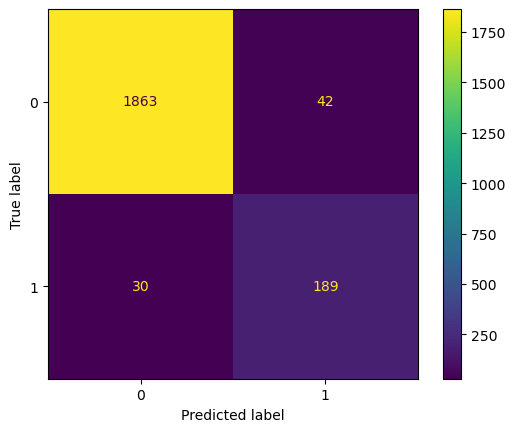

In [4]:
y_true=df["True"].to_list()
y_pred=df["Predicted"].to_list()
cm=metrics.confusion_matrix(y_true,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(cm).plot()

In [5]:
df["Transit peptide"]=0
df["Transmembrane"]=0

In [6]:
df_transmem_transit=pd.read_table("./results study/transit_transmem.tsv", header=None)
df_transmem_transit.rename(columns={0:"Acession code", 1:"Transit peptide", 2:"Transmembrane"}, inplace=True)

In [7]:
conditions = [
    (df['True'] == 1) & (df['Predicted'] == 1),
    (df['True'] == 0) & (df['Predicted'] == 0),
    (df['True'] == 0) & (df['Predicted'] == 1),
    (df['True'] == 1) & (df['Predicted'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['TP', 'TN', 'FP', 'FN']

df['Test result'] = np.select(conditions, values)

In [9]:
df_merged=df.merge(df_transmem_transit, on='Acession code', how='left')
df_merged.drop(columns=['Transit peptide_x', 'Transmembrane_x'], inplace=True)
df_merged.fillna(0, inplace=True)
df_merged["Transit peptide_y"]=df_merged["Transit peptide_y"].astype(int)
df_merged["Transmembrane_y"]=df_merged["Transmembrane_y"].astype(int)

df_group_TR=df_merged.groupby(['Test result',  "Transit peptide_y","Transmembrane_y"]).count()

df_group_TR.drop(columns=['Predicted', 'True'], inplace=True)
df_grouped_drop=df_group_TR.drop(["FN","TP"])
df_grouped_drop

Acession code
Test result Transit peptide_y Transmembrane_y               
FP          0                 0                           12
                              1                            3
            1                 0                           26
                              1                            1
TN          0                 0                         1513
                              1                          216
            1                 0                          123
                              1                           11

In [13]:
df_TN=pd.DataFrame(df_grouped_drop.loc[("TN")].value_counts())
df_TN=df_TN.reset_index()
df_TN["index"]=["Both","Transit peptide","Transmembrane","None"]
df_TN=df_TN.set_index(df_TN["index"])

In [17]:
pd.DataFrame(df_grouped_drop.loc[("TN")].value_counts())

,count
Acession code,
11,1
123,1
216,1
1513,1


In [20]:
df_FP=pd.DataFrame(df_grouped_drop.loc[("FP")].value_counts())
df_FP=df_FP.reset_index()
df_FP["index"]=["Both","Transmembrane","Transit peptide","None"]
df_FP=df_FP.set_index(df_FP["index"])


In [21]:
property_colors={
    'True negatives (TN)': "#758173",
    'False positives (FP)': "#828C51",
    }

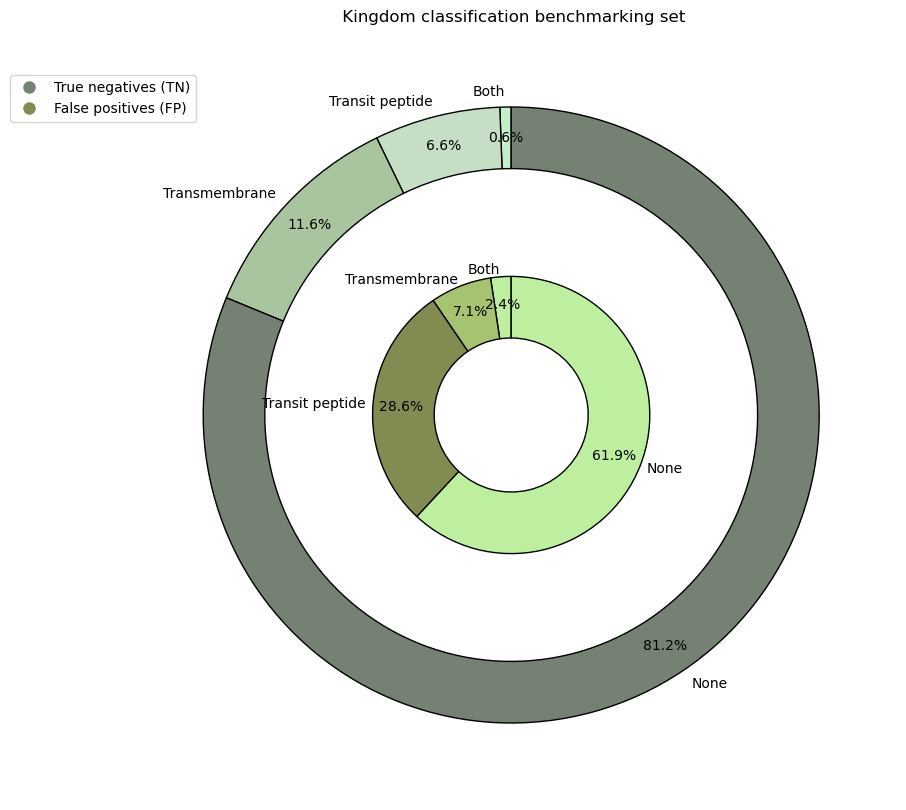

In [22]:
colors1=["#C5EFCB","#C6DEC6","#A9C5A0","#758173"]
colors2=["#BEEF9E","#A6C36F","#828C51"]
explode = (0.03,0.03,0.03,0.03)

plt.figure(figsize=(14,10))
plt.title(" Kingdom classification benchmarking set")

plt.pie(df_TN["Acession code"], labels=df_TN.index, labeldistance=1.05,radius=1, shadow=False, autopct="%.1f%%", wedgeprops=dict(width=0.2, edgecolor='Black'), startangle=90,pctdistance=0.9, textprops={'color':'Black'}, colors=colors1 )
plt.pie(df_FP["Acession code"],labels=df_FP.index, radius=0.45, labeldistance=1.05 ,shadow=False, autopct="%.1f%%",  wedgeprops=dict(width=0.2, edgecolor='Black'), startangle=90,pctdistance=0.8,  textprops={'color':'Black'}, colors=colors2)
legend_labels = {color: property for property, color in property_colors.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                  for color, label in legend_labels.items()]
plt.legend(handles=legend_handles,  bbox_to_anchor=(0.1,0.95))

plt.show()

In [8]:
df=df[df["True"]==1]
df=df[df["Predicted"]==0]
df

,Acession code,Predicted,True
1906,O96559,0,1
1908,A0A7J6K7I9,0,1
1926,O75462,0,1
1927,P01920,0,1
1930,Q6ZSA7,0,1
1941,U6BLZ9,0,1
1945,Q08481,0,1
1948,P48765,0,1
1962,Q8BPM6,0,1
1970,Q63415,0,1


In [9]:
list_FN=df["Acession code"].to_list()
print(len(list_FN))

30


In [11]:
df=pd.read_table("predicted_vs_true.tsv")
df=df[df["True"]==1]
list_TP=df["Acession code"].to_list()
print(len(list_TP))

219


In [ ]:
df=pd.read_table()

In [8]:
bench_df=pd.read_table("SETs/benchmarking_set_parsed_totc.tsv", names=["SP", "sequence", "class", "code"])
bench_df

,SP,sequence,class,code
0,NaN,MRDPVSSQYSSFLFWRMPIPELDLSELEGLGLSDTATYKVKDSSVG...,0,Q13015
1,NaN,MWSTRSPNSTAWPLSLEPDPGMASASTTMHTTTIAEPDPGMSGWPD...,0,P04921
2,NaN,MHQIYSCSDENIEVFTTVIPSKVSSSSRRRVKSSHHLLAKNVVIES...,0,Q8BG31
3,NaN,MSQQQGYYQQGPPQQGYYQQGPPQQGYYQQGPPQQGYPQQQPVYVQ...,0,Q03482
4,NaN,MRMDGSDFEDRKVSKPSPVLPFDVSNIGDLSQGVHSPLGISHFDSK...,0,O94428
...,...,...,...,...
2119,19.0,MKLLTSLVFCSLLLGVCHGGFFSFIGEAFQGAGDMWRAYTDMKEAG...,1,P05367
2120,35.0,MRLPVSFPLTVLSLLGSTIAHPYGETEAVLRSEPKSNQAKADAVKE...,1,P31723
2121,19.0,MATLLLLLGVLVVSPDALGSTTAVQTPTSGEPLVSTSEPLSSKMYT...,1,P16150
2122,31.0,MDPTAPGSSVSSLPLLLVLALGLAILHCVVADGNTTRTPETNGSLC...,1,Q05928


In [9]:
result=bench_df[bench_df["code"].isin(list_FN)]
result

,SP,sequence,class,code
1906,35.0,MRSSYRVGNPIRFQPTNVVGLLLLSLVLSFMLVQSYELGHASGETN...,1,O96559
1908,64.0,MMFPAVAAPPRRLPGERLQRSQNPVETSWLSFRILATRGPCVTSTF...,1,A0A7J6K7I9
1926,37.0,MPAGRRGPAAQSARRPPPLLPLLLLLCVLGAPRAGSGAHTAVISPQ...,1,O75462
1927,32.0,MSWKKALRIPGGLRAATVTLMLAMLSTPVAEGRDSPEDFVYQFKAM...,1,P01920
1930,34.0,MGDTWAQLPWPGPPHPAMLLISLLLAAGLMHSDAGTSCPVLCTCRN...,1,Q6ZSA7
1941,26.0,MIPQLNRNYAWAIALGLVARSSLVSAGPCDIYASGGTPCVAAHGTT...,1,U6BLZ9
1945,17.0,MLLALGLTLVLYASLQAEENSFTINSIHMESLPSWEVMNGQQLTLE...,1,Q08481
1948,32.0,MLQFSLSPTLSMGFHVIAMVALLFSHVDHISAETEMEGEGNETGEC...,1,P48765
1962,31.0,MAYSTVQRVALASGLVLAVSLLLPKAFLSRGKRPEPPPGPEGKLDR...,1,Q8BPM6
1970,45.0,MPPRAPPAPGPRPPPRAAGRHGLSPLAPRPWRWLLLLALPAVCSAL...,1,Q63415


In [10]:
SP_length=result["SP"].to_list()
seq=result["sequence"].to_list()

In [11]:
cleavage_site_FN=[]

for i in range(len(SP_length)):
    cleavage_site=seq[i][int(SP_length[i])-13:int(SP_length[i])+2]
    cleavage_site_FN.append(cleavage_site)
cleavage_site_FN

['LLSLVLSFMLVQSYE',
 'AFLGLSWVSVAVAAH',
 'LLCVLGAPRAGSGAH',
 'LMLAMLSTPVAEGRD',
 'SLLLAAGLMHSDAGT',
 'ALGLVARSSLVSAGP',
 'LGLTLVLYASLQAEE',
 'VALLFSHVDHISAET',
 'VSLLLPKAFLSRGKR',
 'WLLLLALPAVCSALP',
 'LLVLAGLSHFCSGVI',
 'LLSLAALCRSAVPRE',
 'YLLFNAMTALTEEAA',
 'ALLVVTVRHRAHAMA',
 'ILASVLLFSSVLGQR',
 'TLSLLYAITPADGAK',
 'AVTLFAVITSSTCKK',
 'LLLLLLLPRSVLSAV',
 'FILAILLLHAAAGKE',
 'VIMCIFYMPTVNSLP',
 'MVSLALCCYQAHALV',
 'ASIALMKLENVYSAT',
 'YTLITAFLIGVQAEP',
 'KLLLLALAGLTAAYQ',
 'LIPAMAFLSCVRPES',
 'TASFVLSLGFVKAEP',
 'TVLTAVMVGTSEAVS',
 'LQLLPLLLSRAQGNP',
 'LFSVLFAISEVRSKE',
 'CLAVLAASSFSKARE']

In [ ]:
cleavage_sites_FN=pd.DataFrame(cleavage_site_FN)
cleavage_sites_FN.to_csv("results study/FN_for_sequence_logo.tsv", sep="\t")